# Proyecto Final - Data Science I: Fundamentos para la Ciencia de Datos
- **Alumno**: Matias Schinner 
- **Comisión**: 61690

## Desarrollo del proyecto:
En esta notebook, se explicará paso a paso el proceso que se está llevando a cabo. Se abordarán el contexto de los datos, las hipótesis formuladas y los posibles insights. El objetivo es facilitar la comprensión para aquellos que accedan y que no tengan conocimiento previo en ciencia de datos.

Este proyecto tiene como objetivo la clasificación de la calidad del vino basándose en sus características químicas. Utilizando un conjunto de datos de vinos tintos y blancos, se busca explorar la relación entre componentes como la acidez, el contenido de alcohol y otros factores con la calidad del vino. Para ello, se emplearán técnicas de análisis de datos, visualización y algoritmos de clasificación de machine learning.

El análisis se centrará en:
- Explorar las relaciones entre las diferentes variables químicas y su influencia en la calidad del vino.
- Clasificar los vinos en diferentes categorías de calidad (Malo, Regular, Bueno, Muy bueno, Excelente) según su puntaje.
- Identificar las características que más afectan la calidad de los vinos a través de modelos de clasificación.

Este proyecto servirá como práctica en la aplicación de modelos de machine learning para problemas de clasificación multiclase, haciendo uso de bibliotecas como `pandas`, `numpy`, `scikit-learn`, `matplotlib` y `seaborn`. Al final, se espera obtener un modelo que permita predecir la clasificación de calidad de los vinos a partir de sus componentes químicos, además de extraer insights sobre qué variables influyen más en la calidad del vino.


----------

## Dataset elegido:
El conjunto de datos utilizados provienen de dos archivos CSV: uno correspondiente a los vinos blancos y otro a los vinos tintos. Ambos datasets comparten las mismas columnas, que describen varias propiedades químicas del vino y un puntaje de calidad.

### Columnas del dataset:
- **fixed acidity**: Cantidad de ácidos fijos (en su mayoría tartárico y málico) presentes en el vino.
- **volatile acidity**: Cantidad de ácidos volátiles que pueden afectar el sabor del vino (exceso puede provocar sabores desagradables).
- **citric acid**: Un ácido que puede contribuir a la frescura y estabilidad del vino.
- **residual sugar**: Cantidad de azúcar que queda después de la fermentación (más azúcar puede hacer el vino más dulce).
- **chlorides**: Cantidad de sal presente en el vino (cloruros).
- **free sulfur dioxide**: Sulfuro no combinado que previene la oxidación y el crecimiento microbiano.
- **total sulfur dioxide**: Sulfuro total (combinado y libre) que protege el vino de la oxidación y microbios.
- **density**: Densidad del vino, que puede estar relacionada con el contenido de azúcar.
- **pH**: Mide la acidez o alcalinidad del vino.
- **sulphates**: Contribuyen a la estabilidad y frescura del vino, además de mejorar su sabor.
- **alcohol**: El contenido de alcohol del vino.
- **quality**: Puntaje de calidad del vino, con un rango de 1 a 10 (siendo 10 la mejor calidad).
- **color**: Se agregará una nueva columna para diferenciar entre vinos tintos (`red`) y vinos blancos (`white`).

[Fuente: Dataset - Wine Quality](https://archive.ics.uci.edu/dataset/186/wine+quality)

----------
## Hipotesis planteadas:
1. Un mayor contenido de alcohol está asociado con una mayor calidad del vino.
2. La acidez volátil tiene un impacto negativo en la calidad del vino.
3. Los niveles de dióxido de azufre libre y total afectan de manera significativa la calidad del vino, ya que contribuyen a su preservación.
4. La densidad y los sulfatos están correlacionados positivamente con la calidad del vino.

----------
### Se importan las librerias con las que se trabajarán a lo largo del proyecto:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

----------
### Lectura del dataset
Se carga el dataset a partir de los dos archivos "*.csv*" (Uno de vino tinto y otro de vino blanco) y luego se los concatena para obtener un único dataset que contiene todos los registros y se los diferencia añadiendo una columna llamada "**color**" en la cual definirá si el registro es del vino tinto o del vino blanco.

In [2]:
# Carga de los datasets de vinos blancos y tintos
red_wine = pd.read_csv('winequality-red.csv', sep =';')
white_wine = pd.read_csv('winequality-white.csv', sep =';')

# Agregar la columna 'Color' a cada dataset
red_wine['color'] = 'red'
white_wine['color'] = 'white'


#Unir ambos datasets en un solo dataframe
wine_data = pd.concat([white_wine, red_wine], ignore_index=True)

----------
### Analisis exploratorio de datos:

En el análisis exploratorio se realizará:

1. **Control de lectura correcta de los archivos**:  
   Verificación de que los datasets de vinos tintos y blancos se han cargado correctamente y de manera íntegra.

2. **Chequeo del tipo de datos**:  
   Validación de los tipos de datos en cada columna para asegurarse de que están correctos, especialmente en las columnas numéricas y categóricas.

3. **Cantidad de registros**:  
   Recuento del número de registros totales, así como la proporción de vinos tintos y blancos en el dataset final.

4. **Chequeo de datos faltantes**:  
   Identificación de valores nulos o faltantes en las columnas del dataframe. En esta etapa solo se detectarán los valores faltantes, para ser tratados en un paso posterior si es necesario.

5. **Estadísticas descriptivas**:  
   Resumen estadístico de cada variable, incluyendo métricas como la media, mediana, desviación estándar, mínimos y máximos. Esto permitirá tener una idea general de la distribución de los datos y detectar posibles anomalías.
   
6. **Visualización de distribuciones**:  
   Visualización inicial de la distribución de las variables más importantes (como alcohol, acidez y calidad) mediante gráficos como histogramas, boxplots o violines. Esto permitirá detectar posibles problemas en los datos y entender las variaciones entre vinos tintos y blancos.

7. **Detección de outliers**:  
   Análisis de la presencia de outliers mediante estadísticas descriptivas y visualización. Este paso permitirá identificar valores atípicos y decidir si es necesario tratarlos en una fase posterior de limpieza.

8. **Conclusiones preliminares y decisiones para limpieza de datos**:  
    A partir de los insights obtenidos en los pasos anteriores, se decidirá si es necesario tratar outliers, datos faltantes u otros problemas en los datos antes de pasar a la modelización.


------------------------------------------------------------------------
#### **1. Control de lectura correcta de los archivos:**

In [3]:
#Chequeo los primeros 5 datos del dataframe
wine_data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


A primera vista podemos decir que los registros iniciales se encuentran correctamente cargados. 
Tambien podemos notar en la columna `color` que los primeros registros es de vino blanco, esto se debe a que en la concatenación se sumaron los datos del vino tinto a los datos del vino blanco, por lo que al final del dataset deberiamos encontrar registros de vino tinto.

In [4]:
#Comprobamos los ultimos 5 datos del dataframe
wine_data.tail(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,red
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,red
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,red
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,red
6496,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6,red


Podemos comprobar lo que concluimos sobre la concatenación de datos en el texto anterior.

--------------------------------------------------------------------------------------------------------------------------------------------------------

#### **2. Chequeo del tipo de datos:**

In [5]:
#Información sobre los datos
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


-------------
Este resumen nos brinda información sobre:
- **El tipo de datos**: Tenemos **valores númericos flotantes** para casi todas las columnas excepto por la columna `quality` que tiene **valores númericos enteros** y la columna `color` que tiene el tipo **objeto** debido a que es un valor categorico.
- **Cantidad de columnas y registros**: Podemos ver que posee 13 columnas numeradas del 0 al 12 y una cantidad de indices (registros) de 6497 numerados del 0 al 6496. 
- **Conteo de valores no nulos**: El conteo de valores no nulos para todas las columnas es de 6497, es decir, que todos los registros en el dataset contienen valores.
- --------------------------------------------------------------

#### **3. Cantidad de registros:**

In [6]:
#Este codigo nos devuelve una tupla que contiene: (Cantidad de filas/registros/indices, cantidad de columnas)
wine_data.shape

(6497, 13)

---------

#### **4. Chequeo de datos faltantes:**

In [7]:
wine_data.isnull().sum() #isnull Chequea todos los valores faltantes, tanto como NaN como valores vacios

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
dtype: int64

-----------------------------------
Esta tabla nos muestra la cantidad de datos faltantes y valores vacíos, indicando que todas las columnas contienen 0 registros nulos o incompletos. Esto significa que no es necesario realizar tareas de reemplazo o eliminación de datos faltantes en este caso.

Sin embargo, a modo informativo, se detallan las posibles estrategias que podrían aplicarse en caso de que existieran valores nulos:

- _**Eliminar filas o columnas**_: Se pueden eliminar los registros o las columnas que contengan valores nulos, siempre y cuando no afecte negativamente al análisis. `dataframe.dropna(axis=0, inplace=True)` (axis= 1 para columnas, axis= 0 para registros)
- _**Rellenar con valores específicos**_: Reemplazar los valores faltantes por un número fijo, como un 0, o por un promedio, mediana u otro valor estadístico relevante. `dataframe.fillna(promedio, inplace=True)`
- _**Interpolación o métodos avanzados**_: Usar técnicas de interpolación entre los valores proximos a los faltantes. `dataframe.interpolate(limit_direction="both",inplace=True)` 
------------------------------------

#### **5. Estadísticas descriptivas:**

Para llevar un mejor analisis estadistico se dividira el dataframe en los datos de vino tinto y vino blanco con la ayuda de creación de mascaras booleanas:

In [8]:
wine_red = wine_data[wine_data['color']=='red'] #Aplico la mascara al dataset wine_data y lo guardo bajo el nombre 'wine_red'

In [9]:
wine_red.describe().round(2) #Aqui filtro solamente los vinos tintos y hago una descripción estadistica de sus columnas

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00
mean,8.32,0.53,0.27,2.54,0.09,15.87,46.47,1.00,3.31,0.66,10.42,5.64
std,1.74,0.18,0.19,1.41,0.05,10.46,32.90,0.00,0.15,0.17,1.07,0.81
min,4.60,0.12,0.00,0.90,0.01,1.00,6.00,0.99,2.74,0.33,8.40,3.00
25%,7.10,0.39,0.09,1.90,0.07,7.00,22.00,1.00,3.21,0.55,9.50,5.00
50%,7.90,0.52,0.26,2.20,0.08,14.00,38.00,1.00,3.31,0.62,10.20,6.00
75%,9.20,0.64,0.42,2.60,0.09,21.00,62.00,1.00,3.40,0.73,11.10,6.00
max,15.90,1.58,1.00,15.50,0.61,72.00,289.00,1.00,4.01,2.00,14.90,8.00


In [10]:
wine_white = wine_data[wine_data['color']=='white'] #Aplico la mascara al dataset wine_data y lo guardo bajo el nombre 'wine_white'

In [11]:
wine_white.describe().round(2) #Aqui filtro solamente los vinos tintos y hago una descripción estadistica de sus columnas

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.00,4898.00,4898.00,4898.00,4898.00,4898.00,4898.00,4898.00,4898.00,4898.00,4898.00,4898.00
mean,6.85,0.28,0.33,6.39,0.05,35.31,138.36,0.99,3.19,0.49,10.51,5.88
std,0.84,0.10,0.12,5.07,0.02,17.01,42.50,0.00,0.15,0.11,1.23,0.89
min,3.80,0.08,0.00,0.60,0.01,2.00,9.00,0.99,2.72,0.22,8.00,3.00
25%,6.30,0.21,0.27,1.70,0.04,23.00,108.00,0.99,3.09,0.41,9.50,5.00
50%,6.80,0.26,0.32,5.20,0.04,34.00,134.00,0.99,3.18,0.47,10.40,6.00
75%,7.30,0.32,0.39,9.90,0.05,46.00,167.00,1.00,3.28,0.55,11.40,6.00
max,14.20,1.10,1.66,65.80,0.35,289.00,440.00,1.04,3.82,1.08,14.20,9.00


En esta tabla se puede ver: la cantidad, la media, desviación estandar, el mínimo y máximo, cuartiles del 25%, 50% y 75% de cada columna. 
Esto nos otorga una visión sobre los valores, el rango de los mismos, dispersión y media de los datos que estamos trabajando.

A simple vista podemos ver que la cantidad de registros de vinos blancos (4898) es mayor que la de vinos tintos (1599). También se observa que en la mayoría de los promedios y la desviación estándar de los componentes químicos son diferentes entre el vino blanco y el vino tinto, lo que indica que las propiedades químicas varían significativamente entre ambos tipos de vino.

-----

#### **6. Visualización de distribuciones:**
#### **7. Detección de outliers:**  
Estos pasos se realizan en conjunto ya que a partir de las gráficas se puede obtener información para cada objetivo.

##### **Gráfico de boxplot:**

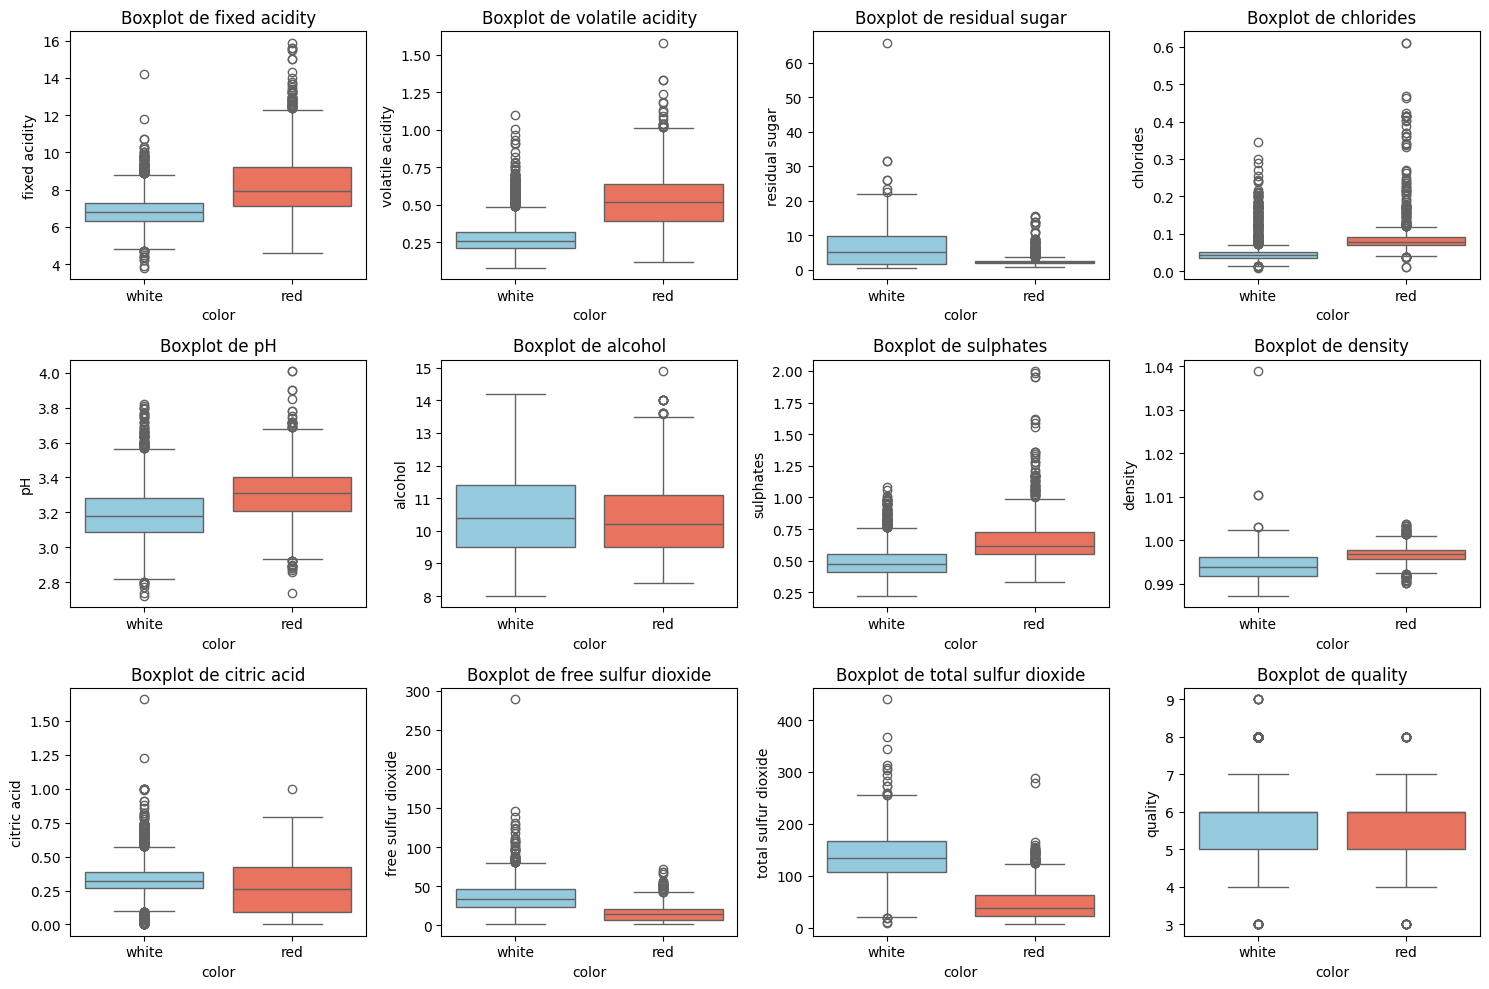

In [12]:
variables = ['fixed acidity', 'volatile acidity', 'residual sugar', 'chlorides', 'pH', 'alcohol', 'sulphates', 'density', 'citric acid', 'free sulfur dioxide', 'total sulfur dioxide', 'quality']

fig, axes = plt.subplots(3, 4, figsize=(15, 10))

palette = {'red': 'tomato', 'white': 'skyblue'}

for var, ax in zip(variables, axes.flatten()):
    sns.boxplot(x='color', y=var, data=wine_data, ax=ax, hue='color', palette=palette)
    ax.set_title(f'Boxplot de {var}')

plt.tight_layout()
plt.show()


**En estos gráficos se analiza para cada vino "white" y "red" como se distribuyen los valores de cada varible de los componentes quimicos.
Analizando los graficos de 1 al 12, de izquierda a derecha:**
 1.  El vino blanco tiene valores más bajos para la cantidad de acidos fijos que el vino tinto. Ambos tienen valores fuera del rango intercuartilicos.
 2.  El vino blanco tiene valores más bajos para la cantidad de acidos volatiles que el vino tinto. Ambos tienen valores fuera del rango intercuartilicos, pero el vino tinto posee más cantidad.
 3.  El vino tinto tiene valores más bajos para la cantidad de azucares residuales que el vino tinto. Ambos tienen valores fuera del rango intercuartilicos, si bien el vino blanco poseé más valores fuera del rango intercuartilico, el vino tinto tiene valores mucho más lejanos fuera del rango intercuartilico y podría tratarse de outliers.
 4.  El vino tinto tiene valores más altos para la cantidad de cloruros que el vino blanco. Ambos poseen muchos valores fuera del rango intercuartilico, pero el vino tinto tiene valores más alejados.
 5.  El vino tinto tiene valores más altos para el pH que el vino blanco. Ambos poseen muchos valores fuera del rango intercuartilico tanto inferiores como superiores.
 6.  En este caso los valores del porcentaje alcohol son semejantes para ambos vinos. El vino tinto tiene valores fuera del rango intercuartilico.
 7.  El vino tinto tiene valores más altos de sulfatos que el vino blanco. Ambos poseen muchos valores fuera del rango intercuartilico tanto inferiores como superiores.
 8.  El vino tinto tiene valores más altos de densidad que el vino blanco y se encuentran más concentrados. Ambos poseen valores fuera del rango intercuartilico, el vino tinto poseé muchos valores fuera del rango intercuartilico pero el vino blanco posee valores muy alejados pudiendose tratar de outliers.
 9.  Tanto el vino tinto como el vino blanco poseen valores similares para el acido citrico pero los del vino tinto se encuentran más dispersos. Ambos poseen valores fuera del rango intercuartilico, el vino tinto poseé solo un valor fuera del rango intercuartilico y el vino blanco posee muchos valores fuera del rango intercuartilico y algunos muy alejados pudiendose tratar de outliers.
 10.  El vino tinto tiene valores más bajos de dióxido de azufre libre que el vino blanco. Ambos poseen muchos valores fuera del rango intercuartilico, el vino blanco posee un valor muy alejados pudiendose tratar de un outlier.
 11.  El vino tinto tiene valores más bajos de dióxido de azufre total que el vino blanco. Ambos poseen muchos valores fuera del rango intercuartilico, y tienen valores muy alejados pudiendose tratarse de outliers.
 12.  Tanto el vino tinto como el vino blanco poseen valores similares para la calidad según el color. El vino blanco tiene 3 valores fuera del rango intercuartilico y el vino tinto solo dos.


##### **Gráfico de Histogramas:**

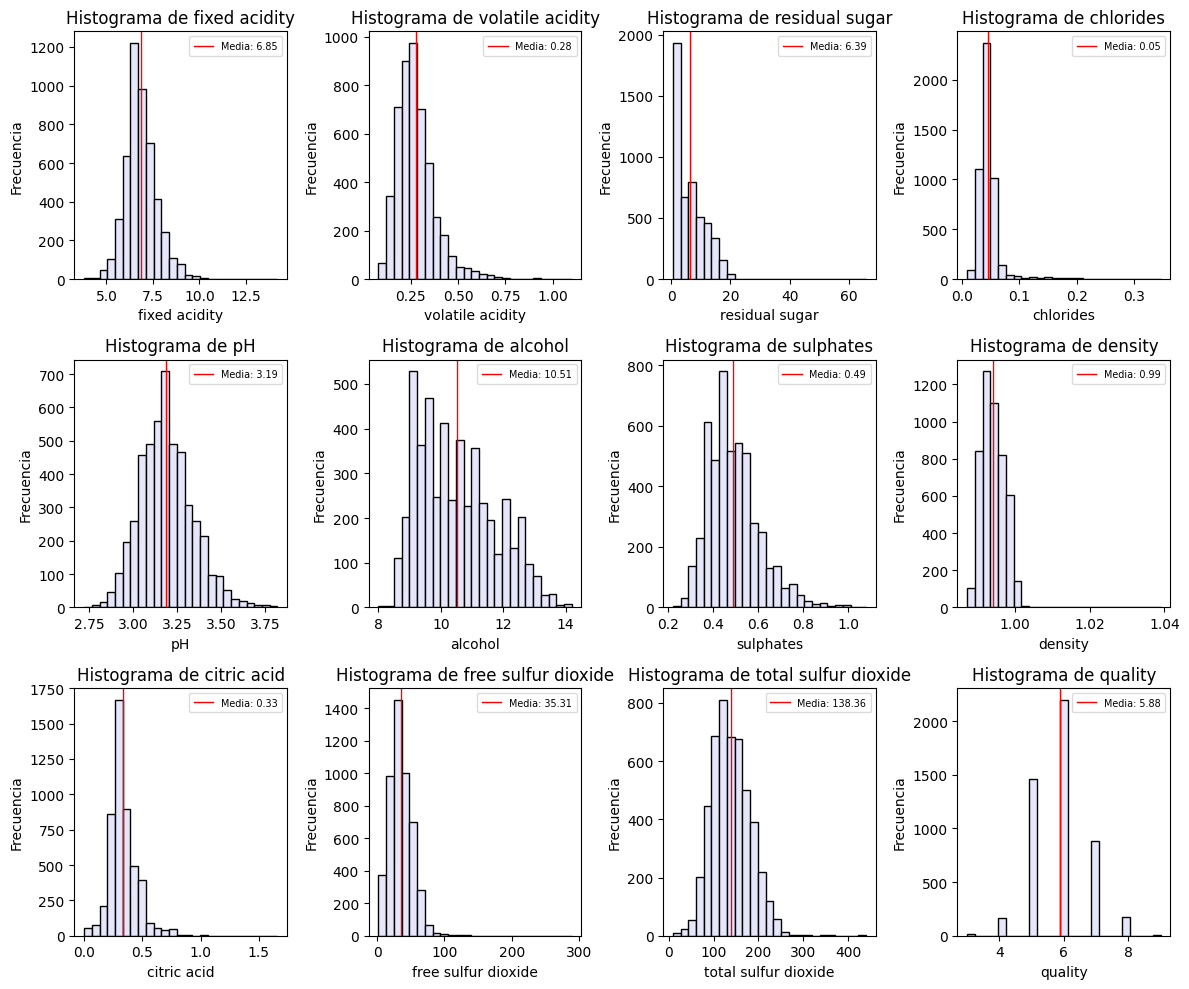

In [13]:
variables = ['fixed acidity', 'volatile acidity', 'residual sugar', 'chlorides', 'pH', 'alcohol', 'sulphates', 'density', 'citric acid', 'free sulfur dioxide', 'total sulfur dioxide', 'quality']

fig, axes = plt.subplots(3, 4, figsize=(12, 10))

for var, ax in zip(variables, axes.flatten()):
    ax.hist(wine_white[var], bins=25, color='lavender', edgecolor='black')
    
    mean = wine_white[var].mean()

    ax.axvline(mean, color='red', linestyle='-', linewidth=1, label=f'Media: {mean:.2f}')
    
    ax.set_title(f'Histograma de {var}')
    ax.set_xlabel(var)
    ax.set_ylabel('Frecuencia')
    ax.legend(loc='upper right', fontsize='x-small', framealpha=0.7, borderpad=0.5)


# Ajustamos el layout
plt.tight_layout()
plt.show()


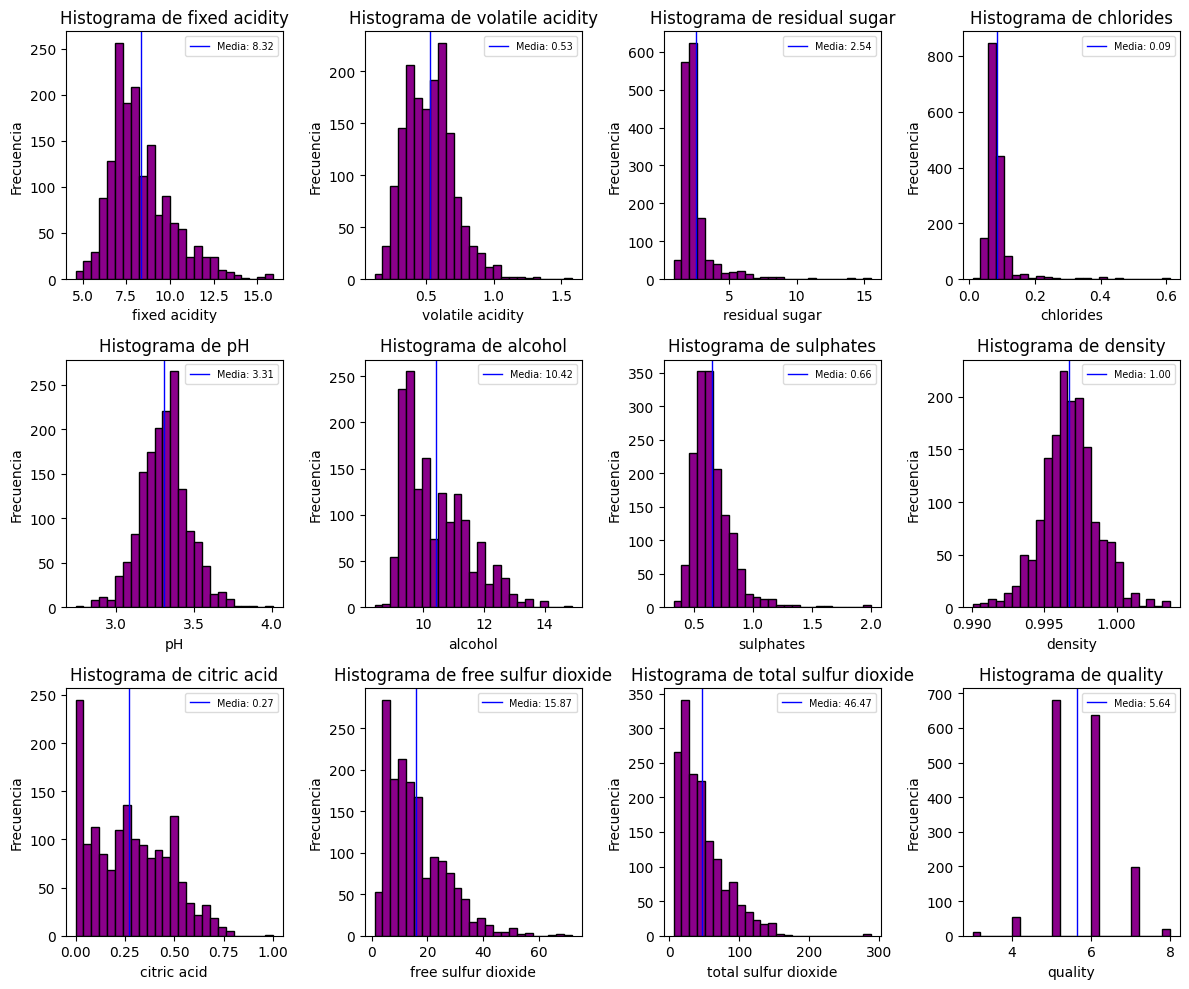

In [14]:
variables = ['fixed acidity', 'volatile acidity', 'residual sugar', 'chlorides', 'pH', 'alcohol', 'sulphates', 'density', 'citric acid', 'free sulfur dioxide', 'total sulfur dioxide', 'quality']

fig, axes = plt.subplots(3, 4, figsize=(12, 10))

for var, ax in zip(variables, axes.flatten()):
    ax.hist(wine_red[var], bins=25, color='darkmagenta', edgecolor='black')
    
    mean = wine_red[var].mean()

    ax.axvline(mean, color='blue', linestyle='-', linewidth=1, label=f'Media: {mean:.2f}')
    
    ax.set_title(f'Histograma de {var}')
    ax.set_xlabel(var)
    ax.set_ylabel('Frecuencia')
    ax.legend(loc='upper right', fontsize='x-small', framealpha=0.7, borderpad=0.5)


# Ajustamos el layout
plt.tight_layout()
plt.show()

En estos últimos dos graficos podemos ver la distribución de la frecuencia de los valores para cada variable.
En el primer grupo de graficos es para el caso del vino blanco, obteniendo su media para las distintas varibles y su respectiva distribución, y lo mismo para el segundo grupo de graficos que es para el vino tinto.
A simple vista podemos ver que hay diferencia en distribuciones para distintas variables entre los vinos, entre ellas:

| Variable      | Media para el Vino Blanco | Media para el Vino Tinto |
|---------------|---------------------------|--------------------------|
|Acidos fijos   |6,85                       |8,32                      |
|Acidos volatiles|0,28 |0,53|
|Azucar residual | 6,39|  2,54|  
| Cloruros | 0,05| 0,09|
| pH| 3,31 | 3,19      |
| Alcohol| 10,51| 10,42 |
| Sulfatos|0,49| 0,66|
| Densidad| 0,99| 1   |
| Acido citrico| 0,33| 0,27 |
| Dioxido de azufre libre| 35,31|15,87 |
| Acidos volatiles| 138,36| 46,47|
| Calidad| 5,88|5,64|


##### **Gráfico Scatter:**

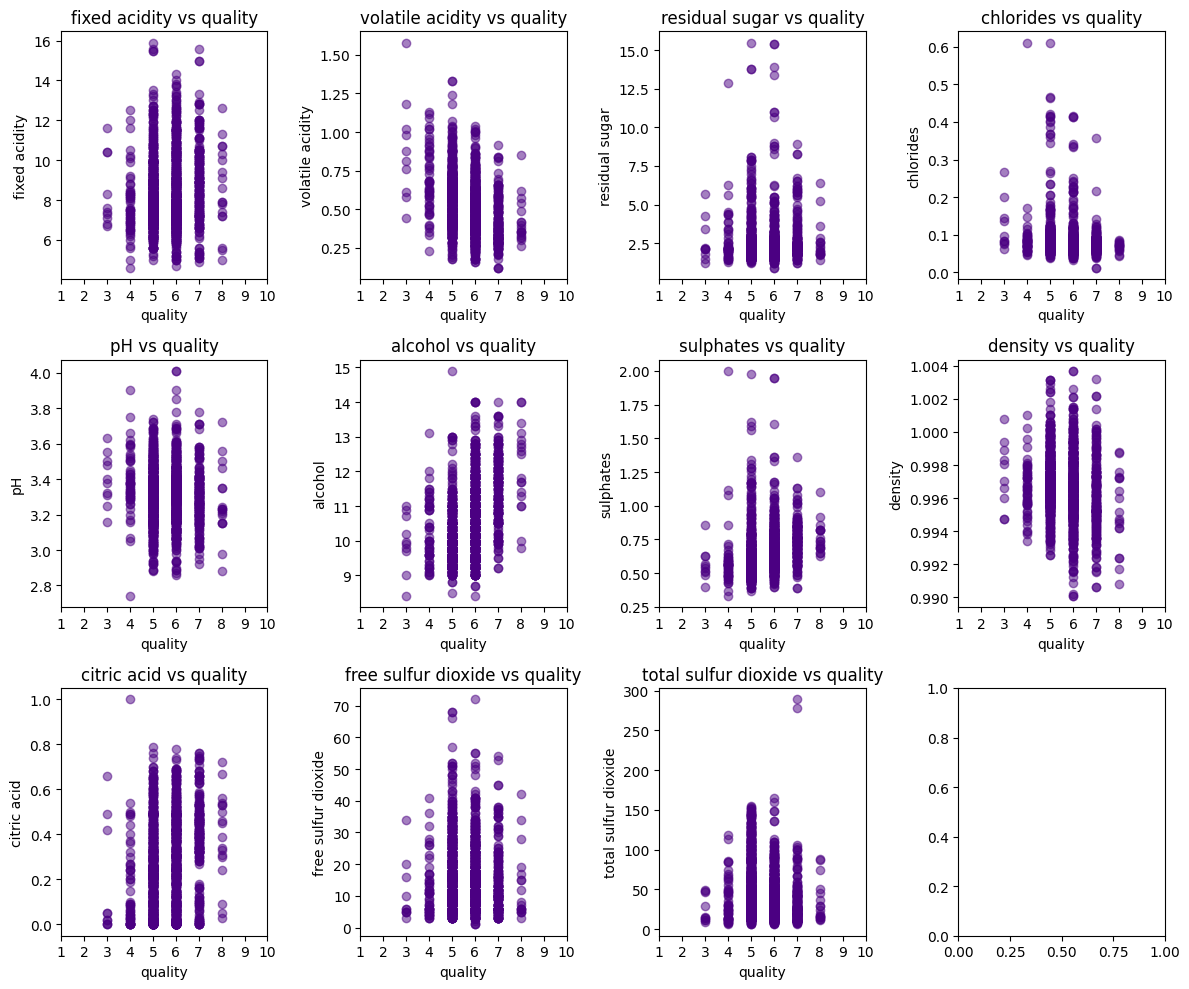

In [15]:
variables = ['fixed acidity', 'volatile acidity', 'residual sugar', 'chlorides', 'pH', 'alcohol', 'sulphates', 'density', 'citric acid', 'free sulfur dioxide', 'total sulfur dioxide']

fig, axes = plt.subplots(3, 4, figsize=(12, 10))

for var, ax in zip(variables, axes.flatten()):
    ax.scatter(wine_red[['quality']], wine_red[[var]], alpha=0.5, color='indigo')
    ax.set_title(f'{var} vs quality')
    ax.set_xlabel('quality')
    ax.set_ylabel(var)
    ax.set_xticks(range(1, 11))

plt.tight_layout()
plt.show()


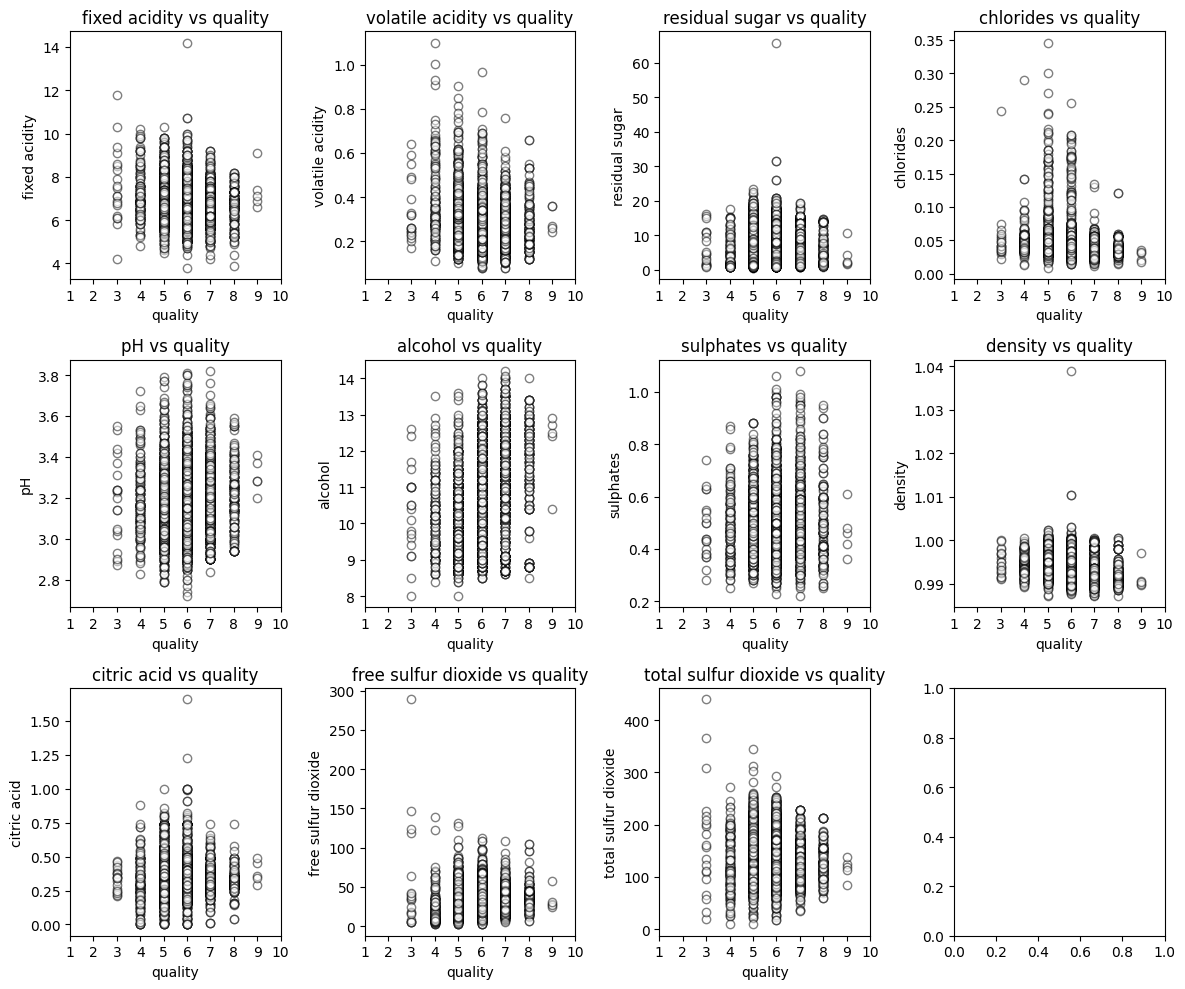

In [16]:
variables = ['fixed acidity', 'volatile acidity', 'residual sugar', 'chlorides', 'pH', 'alcohol', 'sulphates', 'density', 'citric acid', 'free sulfur dioxide', 'total sulfur dioxide']

fig, axes = plt.subplots(3, 4, figsize=(12, 10))

for var, ax in zip(variables, axes.flatten()):
    ax.scatter(wine_white[['quality']], wine_white[[var]], alpha=0.5, facecolors='white', edgecolors='black')
    ax.set_title(f'{var} vs quality')
    ax.set_xlabel('quality')
    ax.set_ylabel(var)
    ax.set_xticks(range(1, 11))

plt.tight_layout()
plt.show()


En estos graficos ya podemos notar que hay cierta correlación entre los parametros y el puntaje de calidad.
Para verlo mejor haremos una matriz de correlación para ver los valores de correlación que tienen entre cada uno de los parametros.


##### **Matriz de correlación:**

**Interpretación del Coeficiente de Correlación**
- 0 a 0.2: Sin correlación o correlación muy débil.
- 0.2 a 0.3: Correlación débil.
- 0.3 a 0.5: Correlación moderada.
- 0.5 a 0.7: Correlación fuerte.
- 0.7 a 1.0: Correlación muy fuerte.

**Interpretación del signo de la correlación:**
- <u>Correlación negativa</u>: Un valor negativo indica que a medida que una variable aumenta, la otra tiende a disminuir. 
- <u>Correlación positiva</u>: Un valor positivo indica que ambas variables tienden a aumentar o disminuir juntas.

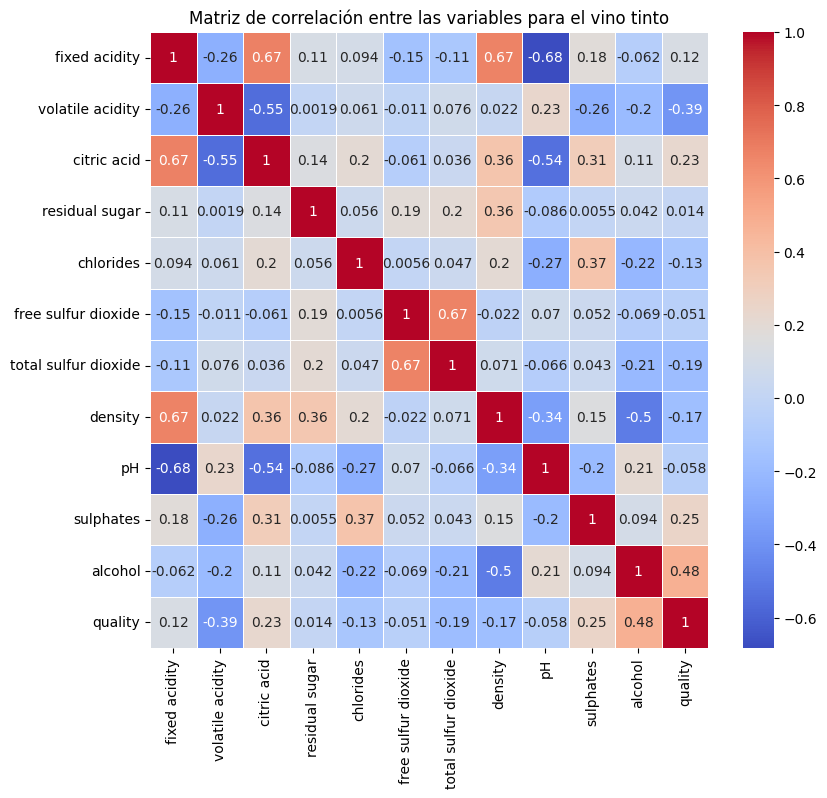

In [17]:
plt.figure(figsize=(9,8))
sns.heatmap(wine_red.iloc[:,:12].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de correlación entre las variables para el vino tinto')
plt.show()


**Aquellos que tienen una correlación con el puntaje de calidad son:**

| Variables     | Correlación     | Tipo de correlación     |
|---------------|---------------|---------------|
| Acidos volatiles| -0.39 | Correlación negativa moderada |
| Acido critico| 0.23| Correlación positiva débil|
| Sulfatos| 0.25|Correlación positiva débil|
| Alcohol| 0.48|Correlación positiva moderada/fuerte|


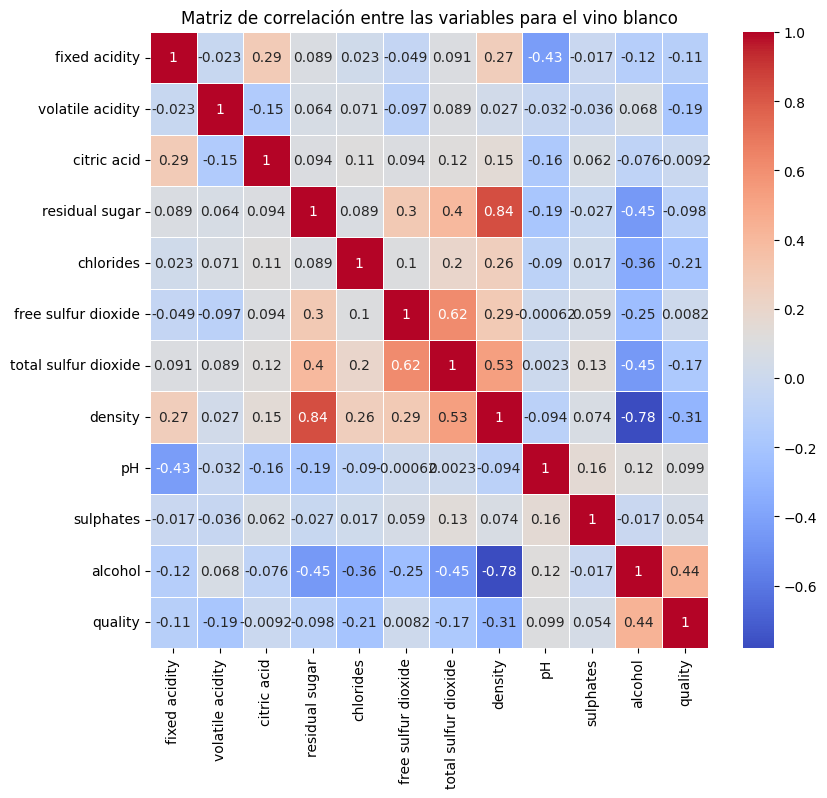

In [18]:
plt.figure(figsize=(9,8))
sns.heatmap(wine_white.iloc[:,:12].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de correlación entre las variables para el vino blanco')
plt.show()

**Aquellos que tienen una correlación con el puntaje de calidad son:**

| Variables     | Correlación     | Tipo de correlación     |
|---------------|---------------|---------------|
| Acidos volatiles| -0.19 | Correlación negativa débil |
| Cloruros| -0.21| Correlación negativa débil|
| Densidad| -0.31|Correlación negativa moderada|
| Alcohol| 0.44|Correlación positiva moderada/fuerte|

##### **Gráfico de violin para los tipos de vino**:

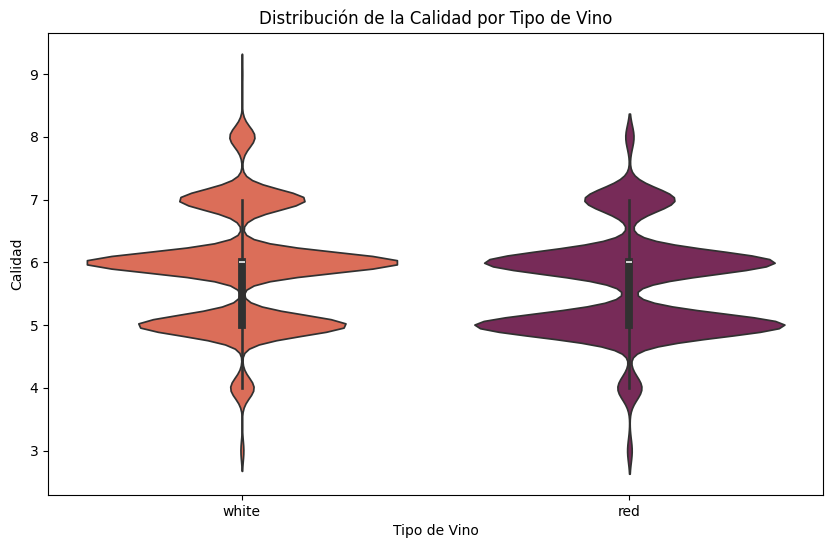

In [19]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='color', y='quality', data=wine_data, hue='color', palette='rocket_r', legend=False)
plt.title('Distribución de la Calidad por Tipo de Vino')
plt.xlabel('Tipo de Vino')
plt.ylabel('Calidad')
plt.show()


Este gráfico muestra la distribución de la calidad del vino (calificación de 1 a 10) para los vinos tintos y blancos. Cada "violín" representa la densidad de probabilidad de la calidad de los vinos en función de su tipo (tinto o blanco).

##### **Gráfico de pairplot:**

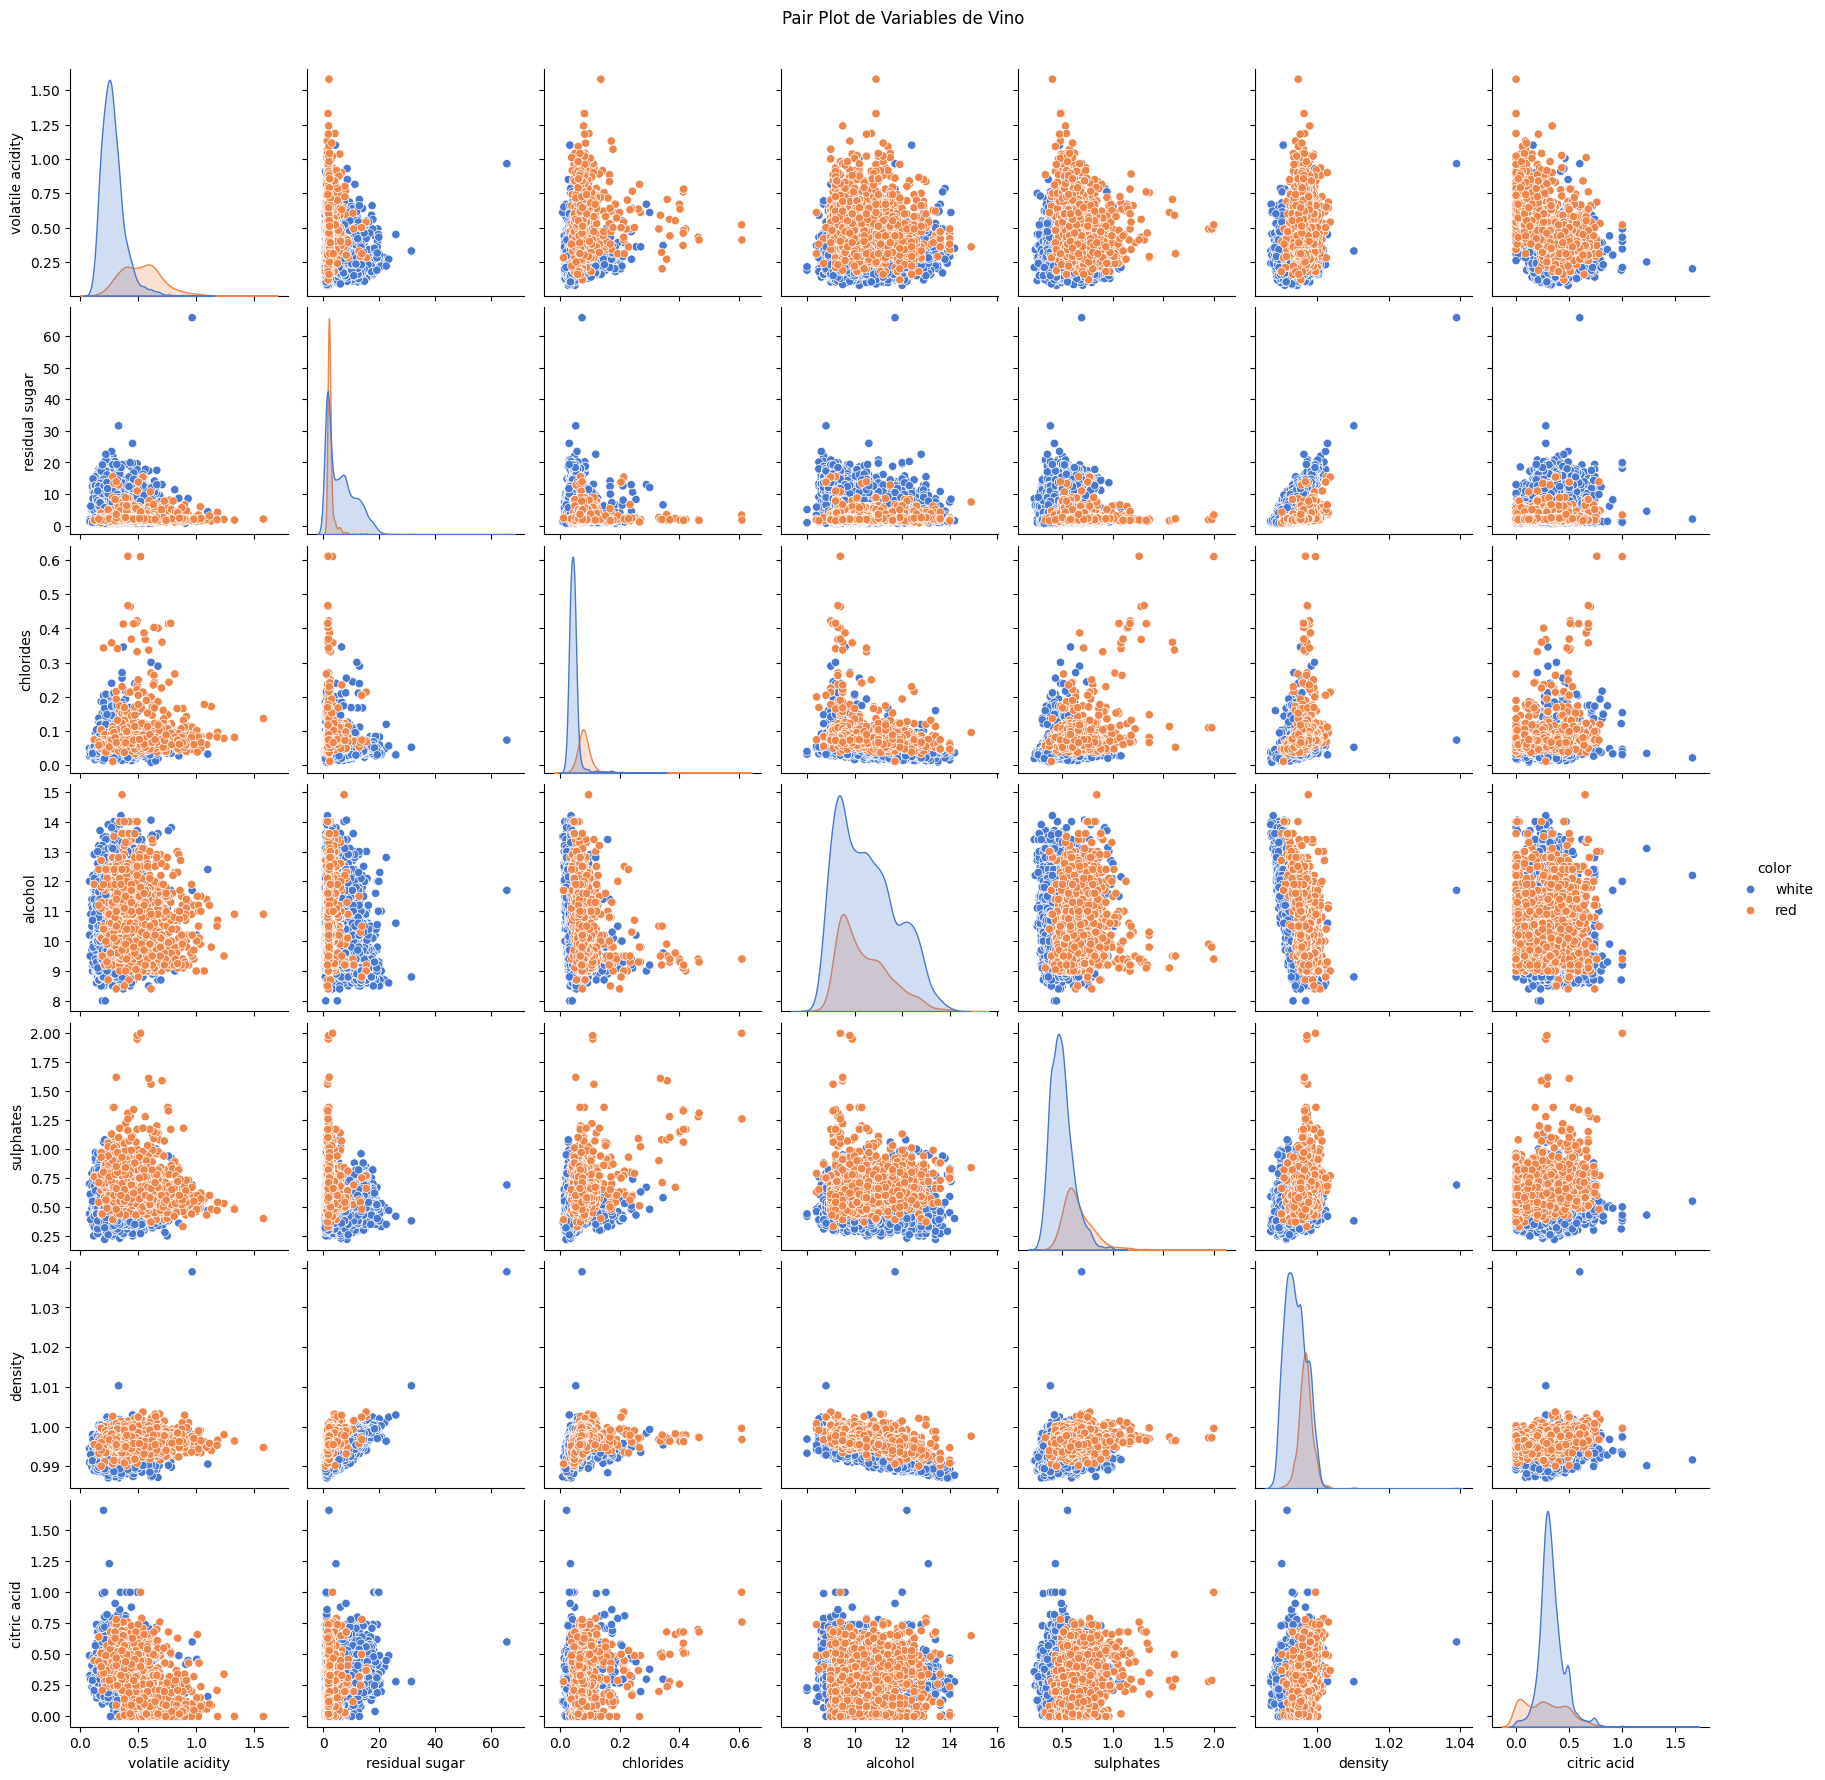

In [20]:
variables = ['volatile acidity', 'residual sugar', 'chlorides', 'alcohol', 'sulphates', 'density', 'citric acid', 'color']

sns.pairplot(wine_data[variables], hue='color', palette='muted', diag_kind='kde')
plt.suptitle('Pair Plot de Variables de Vino', y=1.02)
plt.show()

El pair plot es una visualización que muestra las relaciones entre múltiples variables en el conjunto de datos, en este caso, las características químicas del vino (como acidez, pH, y alcohol) y la calidad, diferenciando entre vinos tintos y blancos.